In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, accuracy_score, classification_report, mean_squared_error,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from IPython.display import clear_output
import collections
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline




In [3]:
diabetes_012_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_binary_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_binary_5050split_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the CSV file
diabetes_012_health_indicators_BRFSS2015 = pd.read_csv(diabetes_012_health_indicators_BRFSS2015)
diabetes_binary_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_health_indicators_BRFSS2015)
diabetes_binary_5050split_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_5050split_health_indicators_BRFSS2015)

## 1.  RandomForest on Diabetes_5050

In [37]:
X_5050 = diabetes_binary_5050split_health_indicators_BRFSS2015.drop('Diabetes_binary', axis=1)
y_5050 = diabetes_binary_5050split_health_indicators_BRFSS2015['Diabetes_binary']

# split
X_train_5050, X_test_5050, y_train_5050, y_test_5050 = train_test_split(X_5050, y_5050, test_size=0.2, random_state=42 )
y_train_5050.value_counts()

Diabetes_binary
1.0    28297
0.0    28256
Name: count, dtype: int64

In [39]:
# Define the model and parameter grid
rf_5050 = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Perform GridSearchCV
grid_search_5050 = GridSearchCV(estimator=rf_5050, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search_5050.fit(X_train_5050, y_train_5050)

# Print the best parameters and best score
print("Best Parameters:", grid_search_5050.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_5050.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   8.3s
[CV] END max_depth=None, 

In [120]:
# Use the best hyperparameters from GridSearchCV
best_model_5050 = grid_search_5050.best_estimator_

# Retrain the model with the selected features
best_model_5050.fit(X_train_5050, y_train_5050)

y_pred_5050 = best_model_5050.predict(X_test_5050)

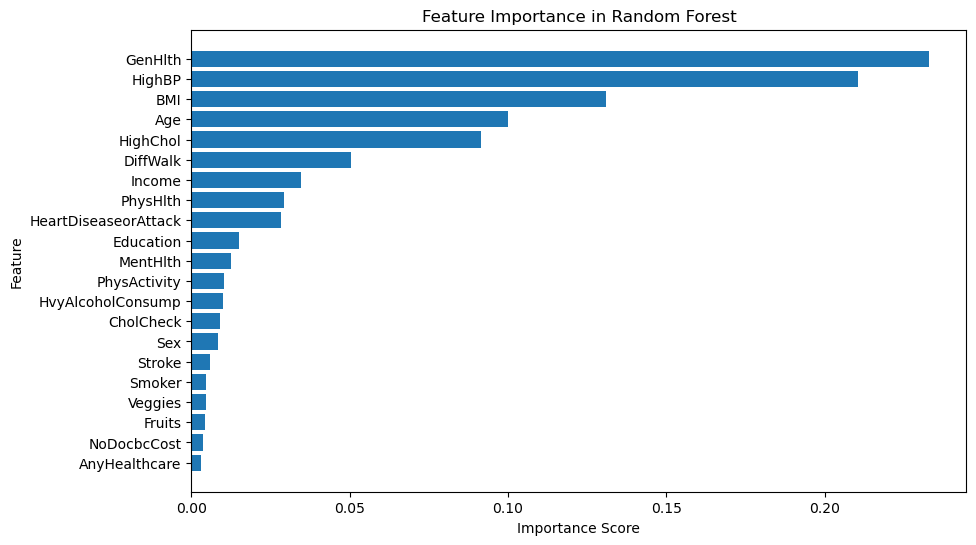

Selected Features:
['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'Income', 'PhysHlth', 'HeartDiseaseorAttack', 'Education', 'MentHlth', 'PhysActivity', 'HvyAlcoholConsump']


In [121]:
# Feature Importance
feature_importances_5050 = best_model_5050.feature_importances_
features_5050 = X_5050.columns  # Replace X with the feature dataset used for training
importance_df_5050 = pd.DataFrame({'Feature': features_5050, 'Importance': feature_importances_5050})
importance_df_5050 = importance_df_5050.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df_5050['Feature'], importance_df_5050['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()
selected_features_5050 = importance_df_5050[importance_df_5050['Importance'] > 0.01]['Feature']
X_train_selected_5050 = X_train_5050[selected_features_5050]
X_test_selected_5050 = X_test_5050[selected_features_5050]

print(f"Selected Features:\n{selected_features_5050.tolist()}")

In [122]:
# Use the best hyperparameters from GridSearchCV
best_model_selected5050 = grid_search_5050.best_estimator_

# Retrain the model with the selected features
best_model_selected5050.fit(X_train_selected_5050, y_train_5050)

y_pred_selected5050 = best_model_selected5050.predict(X_test_selected_5050)

In [123]:
# Accuracy
accuracy_select_5050 = accuracy_score(y_test_5050, y_pred_selected5050)
accuracy_5050 = accuracy_score(y_test_5050, y_pred_5050)
print("Accuracy after Variable Selection: ",accuracy_select_5050, "Accuracy before Variable Selection: ",accuracy_5050)

# Classification Report
print("Classification Report after Variable Selection:")
print(classification_report(y_test_5050, y_pred_selected5050))
print("Classification Report before Variable Selection:")
print(classification_report(y_test_5050, y_pred_5050))

Accuracy after Variable Selection:  0.7495579602517859 Accuracy before Variable Selection:  0.7508310347266426
Classification Report after Variable Selection:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Classification Report before Variable Selection:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



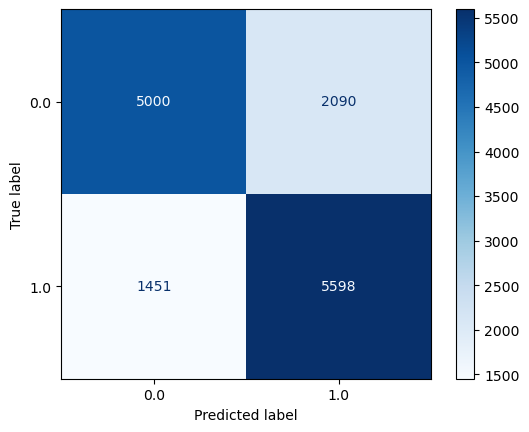

In [124]:

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_5050, y_pred_selected5050), display_labels=best_model_5050.classes_)
disp.plot(cmap='Blues')
plt.show()

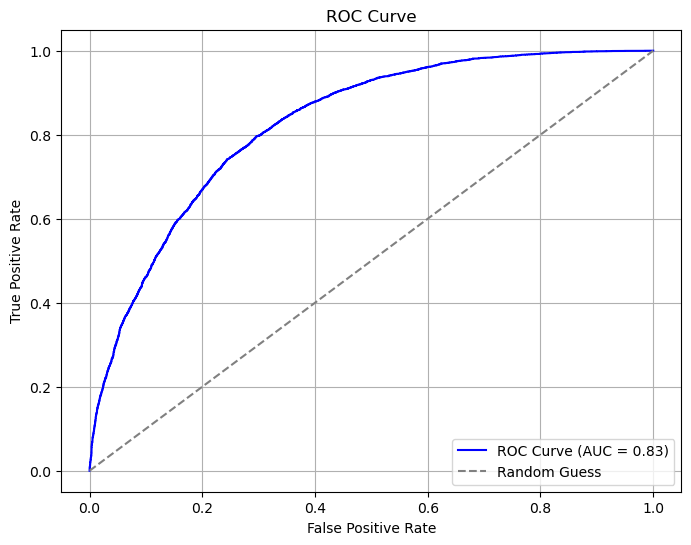

In [125]:


# Step 1: Get predicted probabilities for the positive class
y_prob_5050 = best_model_selected5050.predict_proba(X_test_selected_5050)[:, 1]  # Probability for the positive class

# Step 2: Compute the ROC curve
fpr5050, tpr5050, thresholds5050 = roc_curve(y_test_5050, y_prob_5050)

# Step 3: Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test_5050, y_prob_5050)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr5050, tpr5050, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 2.  RandomForest on Diabetes_012

In [6]:
X = diabetes_012_health_indicators_BRFSS2015.drop('Diabetes_012', axis=1)
y = diabetes_012_health_indicators_BRFSS2015['Diabetes_012']


In [97]:

# Deal with imbalance
df = diabetes_012_health_indicators_BRFSS2015

# Separate the data by class
class_0 = df[df['Diabetes_012'] == 0]
class_1 = df[df['Diabetes_012'] == 1]
class_2 = df[df['Diabetes_012'] == 2]

# Class 2 size
class_2_size = len(class_2)

# Randomly undersample class 0 to match the size of class 2 since class 0 has too many more observations
class_0_undersampled = class_0.sample(n=class_2_size, random_state=11)

# Randomly oversample class 1 to match the size of class 2 since class 1 has too little observations
class_1_oversampled = class_1.sample(n=class_2_size, random_state=11, replace=True)

# Combine the undersampled class 0 data with class 1 and class 2 data
df_sm = pd.concat([class_0_undersampled, class_1_oversampled, class_2])

# Shuffle the combined dataset
df_sm = df_sm.sample(frac=1, random_state=11).reset_index(drop=True)

# Split the features and labels
X_diabetes012_sm = df_sm.drop(['Diabetes_012'], axis=1)
y_diabetes012_sm = df_sm['Diabetes_012']

X_train_diabetes012_sm, X_test_diabetes012_sm, y_train_diabetes012_sm, y_test_diabetes012_sm = train_test_split(
    X_diabetes012_sm, y_diabetes012_sm, test_size=0.2, stratify=y_diabetes012_sm, random_state=11
)


In [103]:
# Define the model and parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_diabetes012_sm, y_train_diabetes012_sm)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  13.0s
[CV] END max_depth=None, 

In [131]:
best_model012 = grid_search.best_estimator_
best_model012.fit(X_train_diabetes012_sm, y_train_diabetes012_sm)

y_pred_diabetes012_sm = best_model012.predict(X_test_diabetes012_sm)


Test Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      7069
         1.0       0.97      0.99      0.98      7070
         2.0       0.72      0.79      0.76      7069

    accuracy                           0.82     21208
   macro avg       0.82      0.82      0.82     21208
weighted avg       0.82      0.82      0.82     21208



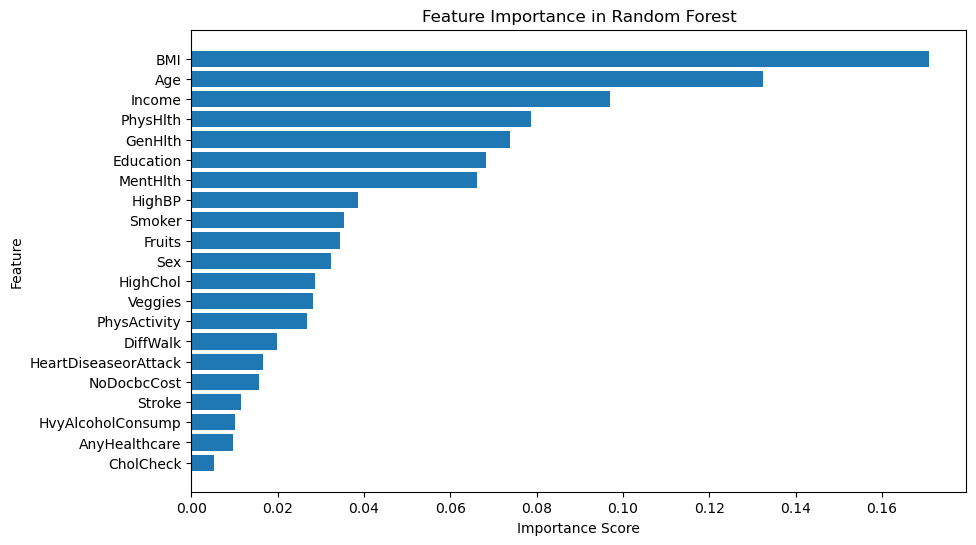

Selected Features:
['BMI', 'Age', 'Income', 'PhysHlth', 'GenHlth', 'Education', 'MentHlth', 'HighBP', 'Smoker', 'Fruits', 'Sex', 'HighChol', 'Veggies', 'PhysActivity']


In [132]:

# Get feature importance from the trained model
feature_importances012 = best_model012.feature_importances_

# Create a DataFrame to visualize feature importance
features012 = X.columns  # Replace X with the feature dataset used for training
importance_df012 = pd.DataFrame({'Feature': features012, 'Importance': feature_importances012})
importance_df012 = importance_df012.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df012['Feature'], importance_df012['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

selected_features012 = importance_df012[importance_df012['Importance'] > 0.025]['Feature']
X_train_selected012 = X_train_diabetes012_sm[selected_features012]
X_test_selected012 = X_test_diabetes012_sm[selected_features012]

print(f"Selected Features:\n{selected_features012.tolist()}")

In [133]:
# Use the best hyperparameters from GridSearchCV
best_model_select012 = grid_search.best_estimator_

# Retrain the model with the selected features
best_model_select012.fit(X_train_selected012, y_train_diabetes012_sm)

y_pred_selected012 = best_model_select012.predict(X_test_selected012)


In [134]:
# Accuracy
accuracy_select_012 = accuracy_score(y_test_diabetes012_sm, y_pred_selected012)
accuracy_012 = accuracy_score(y_test_diabetes012_sm, y_pred_diabetes012_sm)
print("Accuracy after Variable Selection: ",accuracy_select_012, "Accuracy before Variable Selection: ",accuracy_012)

# Classification Report
print("Classification Report after Variable Selection:")
print(classification_report(y_test_diabetes012_sm, y_pred_selected012))
print("Classification Report before Variable Selection:")
print(classification_report(y_test_diabetes012_sm, y_pred_diabetes012_sm))


Accuracy after Variable Selection:  0.8198792908336476 Accuracy before Variable Selection:  0.8232742361373067
Classification Report after Variable Selection:
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73      7069
         1.0       0.96      0.99      0.98      7070
         2.0       0.72      0.78      0.75      7069

    accuracy                           0.82     21208
   macro avg       0.82      0.82      0.82     21208
weighted avg       0.82      0.82      0.82     21208

Classification Report before Variable Selection:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      7069
         1.0       0.97      0.99      0.98      7070
         2.0       0.72      0.79      0.76      7069

    accuracy                           0.82     21208
   macro avg       0.82      0.82      0.82     21208
weighted avg       0.82      0.82      0.82     21208



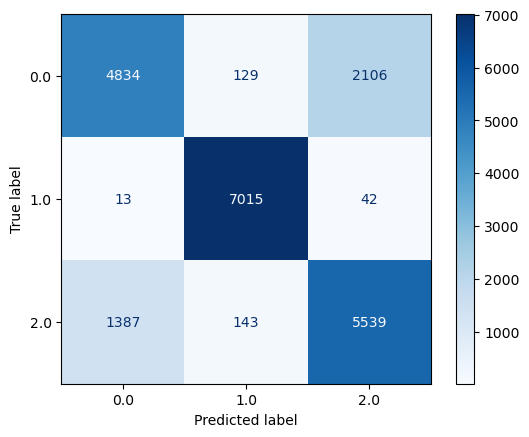

In [135]:
cm012 = confusion_matrix(y_test_diabetes012_sm, y_pred_selected012)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm012, display_labels=best_model012.classes_)
disp.plot(cmap='Blues')
plt.show()

## 3.  RandomForest on Diabetes_binary

In [138]:
X_b = diabetes_binary_health_indicators_BRFSS2015.drop('Diabetes_binary', axis=1)
y_b = diabetes_binary_health_indicators_BRFSS2015['Diabetes_binary']
pd.Series(y_b).value_counts()


Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [164]:

# Deal with imbalance
dfb = diabetes_binary_health_indicators_BRFSS2015

# Separate the data by class
class_b0 = dfb[dfb['Diabetes_binary'] == 0]
class_b1 = dfb[dfb['Diabetes_binary'] == 1]
class_b0_size = len(class_b0)
class_b1_oversampled = class_b1.sample(n=class_b0_size, random_state=11, replace=True)

# Combine the undersampled class 0 data with class 1 and class 2 data
dfb_sm = pd.concat([class_b0, class_b1_oversampled])

# Shuffle the combined dataset
dfb_sm = dfb_sm.sample(frac=1, random_state=11).reset_index(drop=True)

# Split the features and labels
X_diabetesb_sm = dfb_sm.drop(['Diabetes_binary'], axis=1)
y_diabetesb_sm = dfb_sm['Diabetes_binary']

X_train_diabetesb_sm, X_test_diabetesb_sm, y_train_diabetesb_sm, y_test_diabetesb_sm = train_test_split(
    X_diabetesb_sm, y_diabetesb_sm, test_size=0.2, stratify=y_diabetesb_sm, random_state=11
)




In [168]:
# Define the model and parameter grid
rf_b = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Perform GridSearchCV
grid_search_b = GridSearchCV(estimator=rf_b, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search_b.fit(X_train_diabetesb_sm, y_train_diabetesb_sm)

# Print the best parameters and best score
print("Best Parameters:", grid_search_b.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_b.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  19.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  19.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  18.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  18.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  18.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  36.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  36.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  36.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  36.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  36.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  54.7s
[CV] END max_depth=None, 

In [169]:
best_model_b = grid_search_b.best_estimator_
best_model_b.fit(X_train_diabetesb_sm, y_train_diabetesb_sm)

y_pred_diabetesb_sm = best_model_b.predict(X_test_diabetesb_sm)


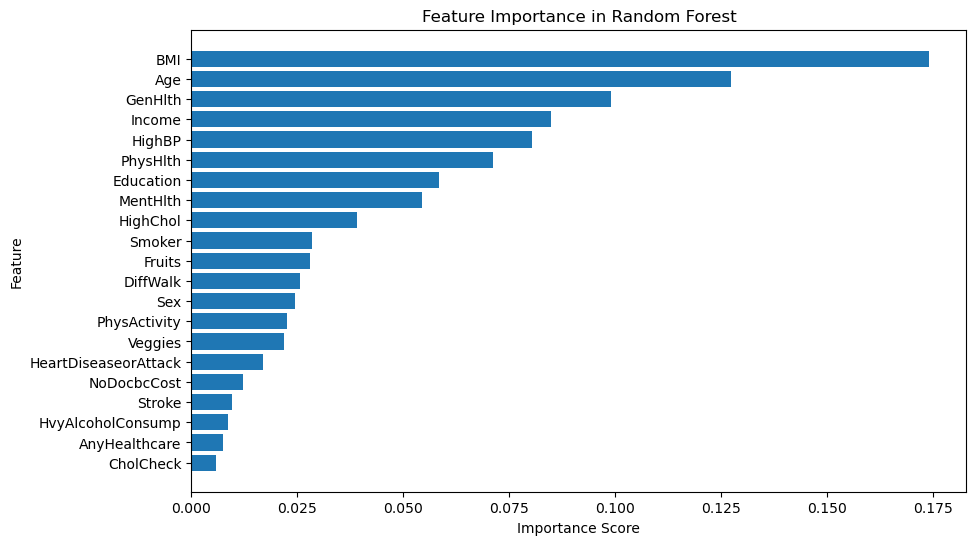

Selected Features:
['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Smoker', 'Fruits', 'DiffWalk', 'Sex', 'PhysActivity', 'Veggies']


In [171]:
# Feature Importance
feature_importances_b = best_model_b.feature_importances_
features_b = X_b.columns  # Replace X with the feature dataset used for training
importance_df_b = pd.DataFrame({'Feature': features_b, 'Importance': feature_importances_b})
importance_df_b = importance_df_b.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_b['Feature'], importance_df_b['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

selected_features_b = importance_df_b[importance_df_b['Importance'] > 0.02]['Feature']
X_train_selected_b = X_train_diabetesb_sm[selected_features_b]
X_test_selected_b = X_test_diabetesb_sm[selected_features_b]

print(f"Selected Features:\n{selected_features_b.tolist()}")

In [172]:
# Use the best hyperparameters from GridSearchCV
best_model_b = grid_search_b.best_estimator_

# Retrain the model with the selected features
best_model_b.fit(X_train_selected_b, y_train_diabetesb_sm)


y_pred_selected_b = best_model_b.predict(X_test_selected_b)

In [173]:
# Accuracy
accuracy_select_b = accuracy_score(y_test_diabetesb_sm, y_pred_selected_b)
accuracy_b = accuracy_score(y_test_diabetesb_sm, y_pred_diabetesb_sm)
print("Accuracy after Variable Selection: ",accuracy_select_b, "Accuracy before Variable Selection: ",accuracy_b)

# Classification Report
print("Classification Report after Variable Selection:")
print(classification_report(y_test_diabetesb_sm, y_pred_selected_b))
print("Classification Report before Variable Selection:")
print(classification_report(y_test_diabetesb_sm, y_pred_diabetesb_sm))

Accuracy after Variable Selection:  0.944843932489065 Accuracy before Variable Selection:  0.9477981084113861
Classification Report after Variable Selection:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     43667
         1.0       0.91      0.99      0.95     43667

    accuracy                           0.94     87334
   macro avg       0.95      0.94      0.94     87334
weighted avg       0.95      0.94      0.94     87334

Classification Report before Variable Selection:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.95     43667
         1.0       0.91      0.99      0.95     43667

    accuracy                           0.95     87334
   macro avg       0.95      0.95      0.95     87334
weighted avg       0.95      0.95      0.95     87334



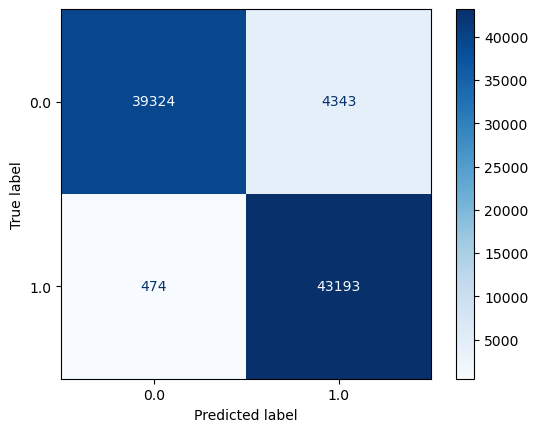

In [174]:
cmb = confusion_matrix(y_test_diabetesb_sm, y_pred_selected_b)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cmb, display_labels=best_model_b.classes_)
disp.plot(cmap='Blues')
plt.show()



In [154]:
pd.Series(y_pred_selected_b).value_counts()


2.0    7629
1.0    7209
0.0    6370
Name: count, dtype: int64

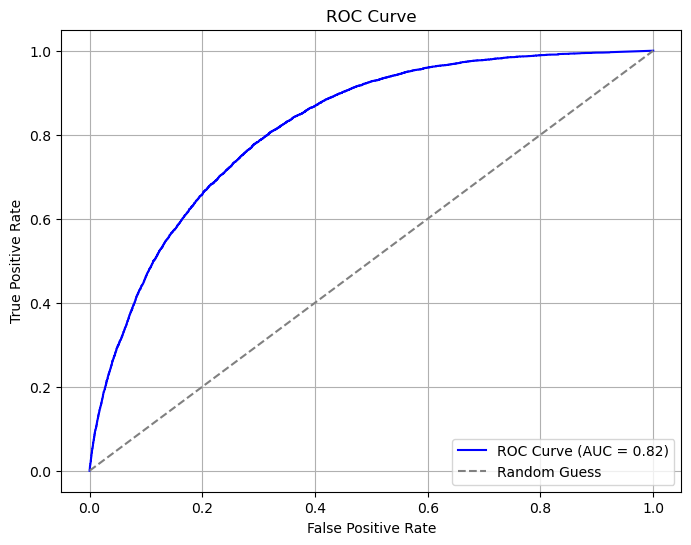

In [69]:
X_test_selected_b = X_test_selected_b[X_train_selected_b.columns]

y_prob_b = best_model_b.predict_proba(X_test_selected_b)[:, 1]  # Probability for the positive class
fprb, tprb, thresholdsb = roc_curve(y_test_diabetesb_sm, y_prob_b)

roc_aucb = roc_auc_score(y_test_diabetesb_sm, y_prob_b)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprb, tprb, color='blue', label=f'ROC Curve (AUC = {roc_aucb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

